# Exploratory Data Analysis for Housing Price Competition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
color = sns.color_palette()
import warnings
from scipy import stats
from scipy.stats import norm, skew #for some statistics


def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

%matplotlib inline
%load_ext autoreload

In [2]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Set the option to display all columns
pd.set_option('display.max_columns', None)

In [3]:
train_data = pd.read_csv(
    r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\home-data-for-ml-course\train.csv'
)

train_data.shape

(1460, 81)

In [4]:
test_data = pd.read_csv(
    r'C:\Users\jorda\Documents\studies\DScourse\CourseMaterials\Data\home-data-for-ml-course\test.csv'
)

test_data_origin = test_data.copy()

test_data.shape

(1459, 80)

### 1. Target ('SalePrice')

In [5]:
train_data['SalePrice'].describe()

count     1460.000
mean    180921.196
std      79442.503
min      34900.000
25%     129975.000
50%     163000.000
75%     214000.000
max     755000.000
Name: SalePrice, dtype: float64

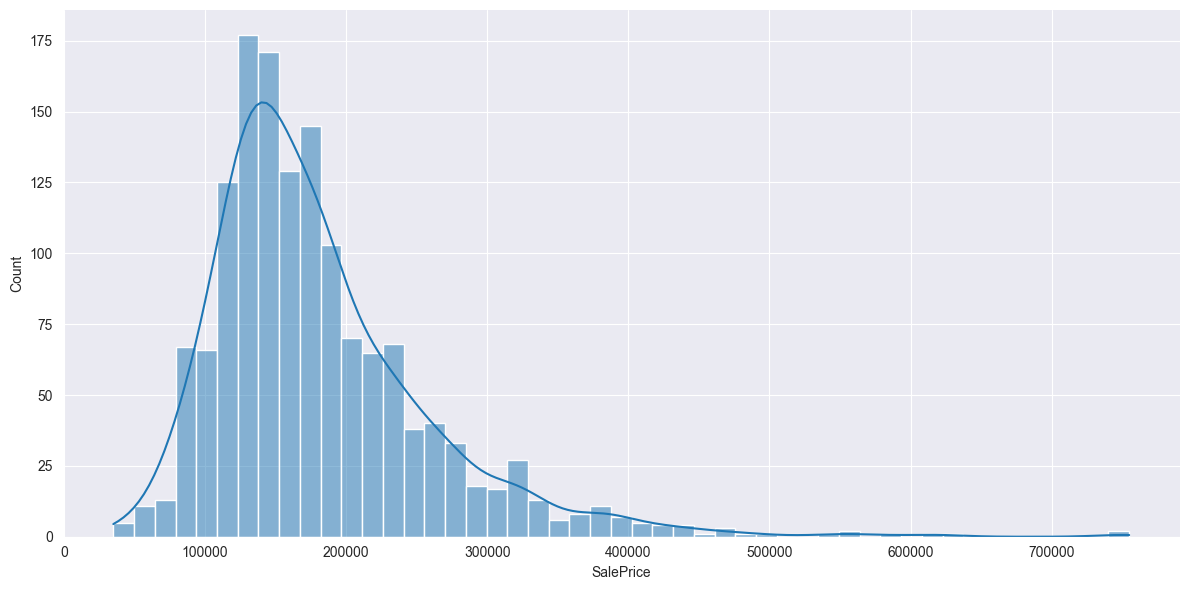

Skewness: 1.882876
Kurtosis: 6.536282


In [6]:
sns.set_style('darkgrid')

sns.displot(train_data['SalePrice'], kind='hist', height=6, aspect=2, kde=True)
plt.show()

print("Skewness: %f" % train_data['SalePrice'].skew())
print("Kurtosis: %f" % train_data['SalePrice'].kurt())

### 2. Omitting Features

In [7]:
# Categorical and numerical
categorical_cols = [col for col in train_data.columns if train_data[col].dtype not in ['int64', 'float64']]
numerical_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]

numerical_cols

suspected_categorical = ['MSSubClass', 'OverallQual', 'OverallCond', 'Fireplaces', 'MoSold', 'YrSold']

not_important_numerical_cols = ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'LowQualFinSF', 'GarageCars', 'PoolArea', 'Id', 'Exterior2nd']

train_data = train_data.drop(not_important_numerical_cols, axis=1)

In [8]:
categorical_cols = [col for col in train_data.columns if train_data[col].dtype not in ['int64', 'float64']]

numerical_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64', 'float64']]

numerical_cols = [col for col in numerical_cols if col not in suspected_categorical]

In [9]:
categorical_cols.extend(suspected_categorical)

not_important_categorical_cols = [
    'LandSlope', 
    'HouseStyle', 
    'RoofMatl', 
    'MasVnrType', 
    'ExterQual', 
    'ExterCond', 
    'Foundation', 
    'BsmtExposure', 
    'BsmtFinType1',
    'BsmtFinType2',
    'GarageFinish',
    'Functional',
    'FireplaceQu',
    'GarageType',
    'GarageYrBlt',
    'BsmtCond',
    'OverallCond',
    'GarageCond',
    'Alley',
    'PoolQC',
    'MiscFeature'
    ]

for col in not_important_categorical_cols:
    if col in categorical_cols:
        categorical_cols.remove(col)

train_data = train_data.drop(not_important_categorical_cols, axis=1)

In [10]:
all_cols = categorical_cols + numerical_cols

len(train_data.columns) == len(all_cols)

False

### 3. Dealing with Nulls

In [11]:
train_data.isnull().sum().sort_index()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BldgType            0
BsmtFullBath        0
BsmtHalfBath        0
BsmtQual           37
BsmtUnfSF           0
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
EnclosedPorch       0
Exterior1st         0
Fence            1179
Fireplaces          0
FullBath            0
GarageArea          0
GarageQual         81
GrLivArea           0
HalfBath            0
Heating             0
HeatingQC           0
KitchenAbvGr        0
KitchenQual         0
LandContour         0
LotArea             0
LotConfig           0
LotShape            0
MSSubClass          0
MSZoning            0
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallQual         0
PavedDrive          0
RoofStyle           0
SaleCondition       0
SalePrice           0
SaleType            0
ScreenPorch         0
Street              0
TotRmsAbvGrd        0
TotalBsmtS

In [12]:
train_data = train_data.fillna('None')

In [13]:
categorical_cols = [col for col in categorical_cols if col in train_data.columns]

numerical_cols = [col for col in numerical_cols if col in train_data.columns]

all_cols = categorical_cols + numerical_cols

len(all_cols) == len(train_data.columns)

True

In [14]:
all_cols.remove('SalePrice')

all_cols

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofStyle',
 'Exterior1st',
 'BsmtQual',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'GarageQual',
 'PavedDrive',
 'Fence',
 'SaleType',
 'SaleCondition',
 'MSSubClass',
 'OverallQual',
 'Fireplaces',
 'MoSold',
 'YrSold',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

In [15]:
test_data = test_data[all_cols]

test_data.isnull().sum().sort_index()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BldgType            0
BsmtFullBath        2
BsmtHalfBath        2
BsmtQual           44
BsmtUnfSF           1
CentralAir          0
Condition1          0
Condition2          0
Electrical          0
EnclosedPorch       0
Exterior1st         1
Fence            1169
Fireplaces          0
FullBath            0
GarageArea          1
GarageQual         78
GrLivArea           0
HalfBath            0
Heating             0
HeatingQC           0
KitchenAbvGr        0
KitchenQual         1
LandContour         0
LotArea             0
LotConfig           0
LotShape            0
MSSubClass          0
MSZoning            4
MiscVal             0
MoSold              0
Neighborhood        0
OpenPorchSF         0
OverallQual         0
PavedDrive          0
RoofStyle           0
SaleCondition       0
SaleType            1
ScreenPorch         0
Street              0
TotRmsAbvGrd        0
TotalBsmtSF         1
Utilities 

In [16]:
test_data[['BsmtQual', 'Fence', 'GarageQual']] = test_data[['BsmtQual', 'Fence', 'GarageQual']].fillna('None')

test_data.shape

(1459, 50)

In [17]:
train_data.shape

(1460, 51)

## Building Enhanced Model

In [18]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')

# Preprocessing of categorical data
one_hot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', one_hot)
])

# Full column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_cols),
        ('categorical', categorical_transformer, categorical_cols)
    ]
)

# Define a Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100, n_jobs=-1)

# Full data pipeline
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

In [19]:
X = train_data.drop(['SalePrice'], axis=1)
y = train_data['SalePrice']

In [20]:
numerical_cols.remove('SalePrice')

In [21]:
rf_pipeline.fit(X, y)

# Access model from pipeline
model = rf_pipeline.named_steps['model']

# Access preprocessor from pipeline
preprocessor = rf_pipeline.named_steps['preprocessor']

# Extract transformed categorical columns from preprocessor
categorical_cols_transformed = preprocessor.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(categorical_cols)

# Combine transformed categorical columns and numerical columns
new_cols = list(numerical_cols) + list(categorical_cols_transformed)

# Extract transformed data from preprocessor
X_transformed_data = preprocessor.transform(X)

# Reconstitute DataFrame after preprocessing
X_transformed = pd.DataFrame(X_transformed_data, columns=new_cols)

# Cross-Validation
cv_scores = cross_val_score(model, X_transformed, y, cv=5)
print(f"Cross-validation scores: {cv_scores}, scores average: {cv_scores.mean(), 'std: ', cv_scores.std()}\n\n")

cv_scores_nmse = cross_val_score(model, X_transformed, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {cv_scores_nmse}, scores average: {cv_scores_nmse.mean(), 'std: ', cv_scores_nmse.std()}")

Cross-validation scores: [0.860555   0.82800801 0.86534254 0.89134813 0.80184908], scores average: (0.8494205526218277, 'std: ', 0.031167129260460183)


Cross-validation scores: [-7.71497588e+08 -1.13010255e+09 -1.02040701e+09 -5.50414588e+08
 -1.32867515e+09], scores average: (-960219379.0373484, 'std: ', 272689707.66433954)


In [22]:
len(X_transformed.columns)

215

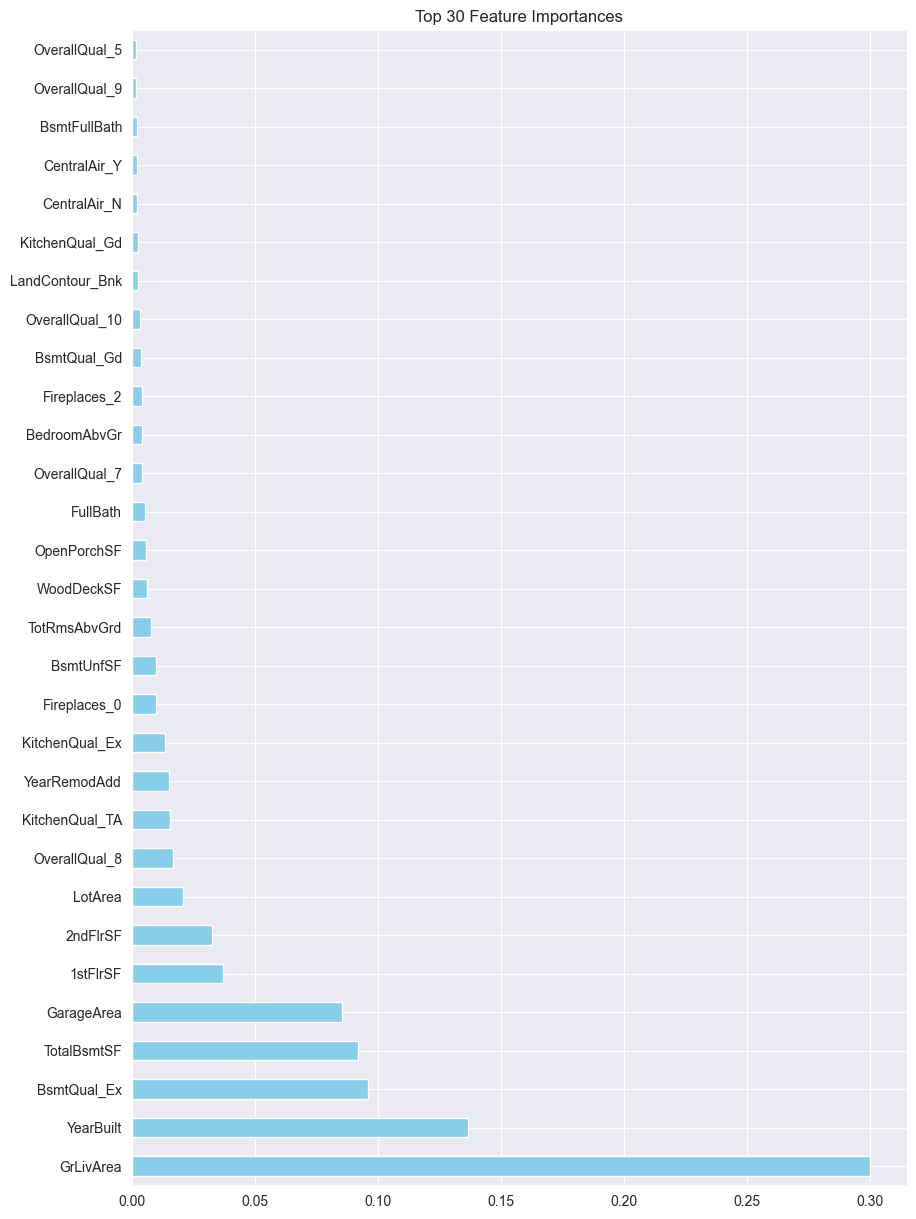

In [23]:
from feature_importance import plot_top_n_importance

plot_top_n_importance(DataFrame=X_transformed, model=model, top_n=30)

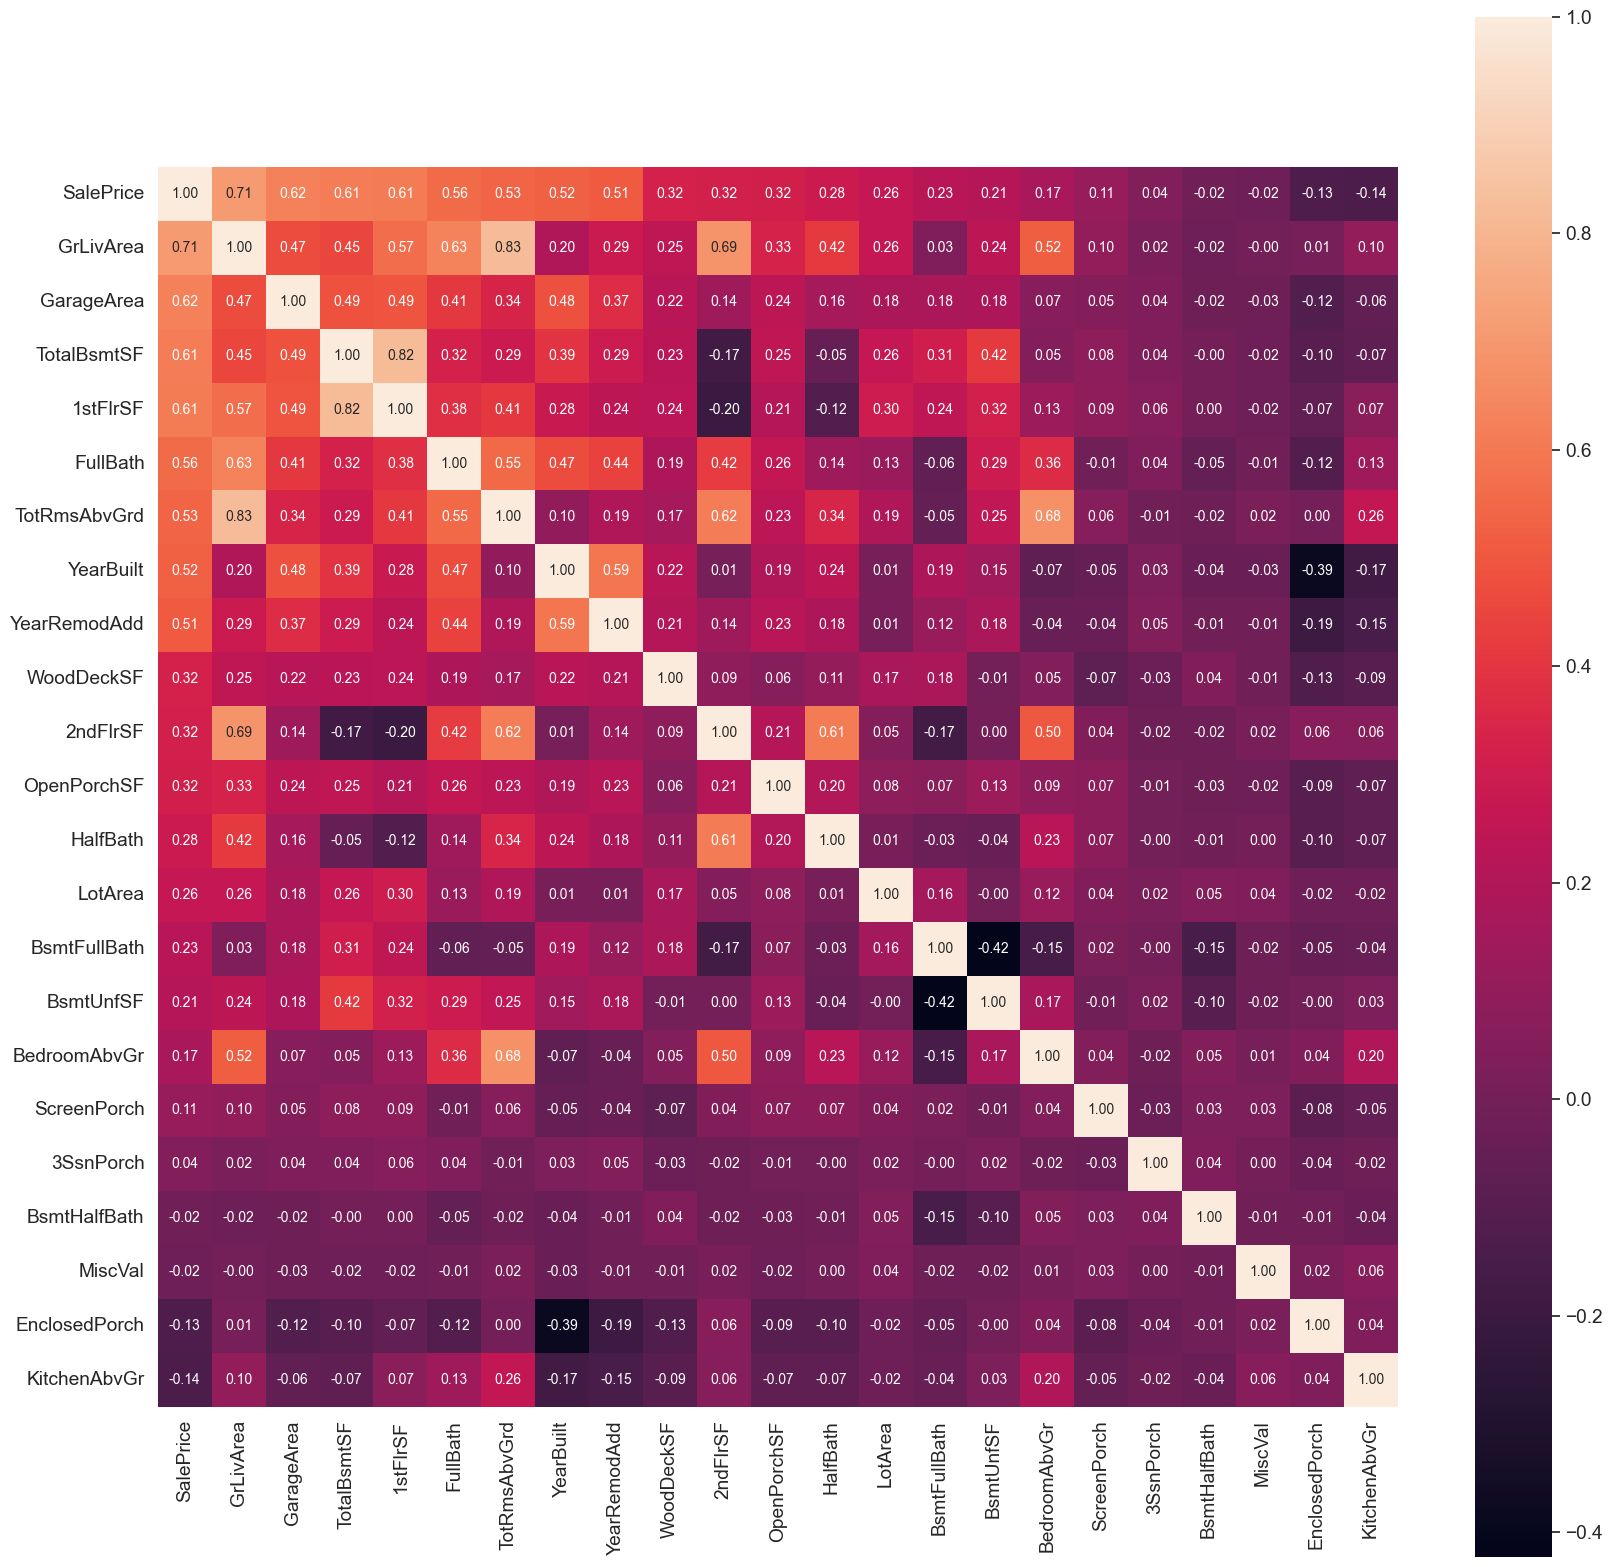

In [24]:
#saleprice correlation matrix
numerical_cols.extend(['SalePrice'])
corrmat = train_data[numerical_cols].corr()

plt.figure(figsize=(20, 20))
k = 23 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

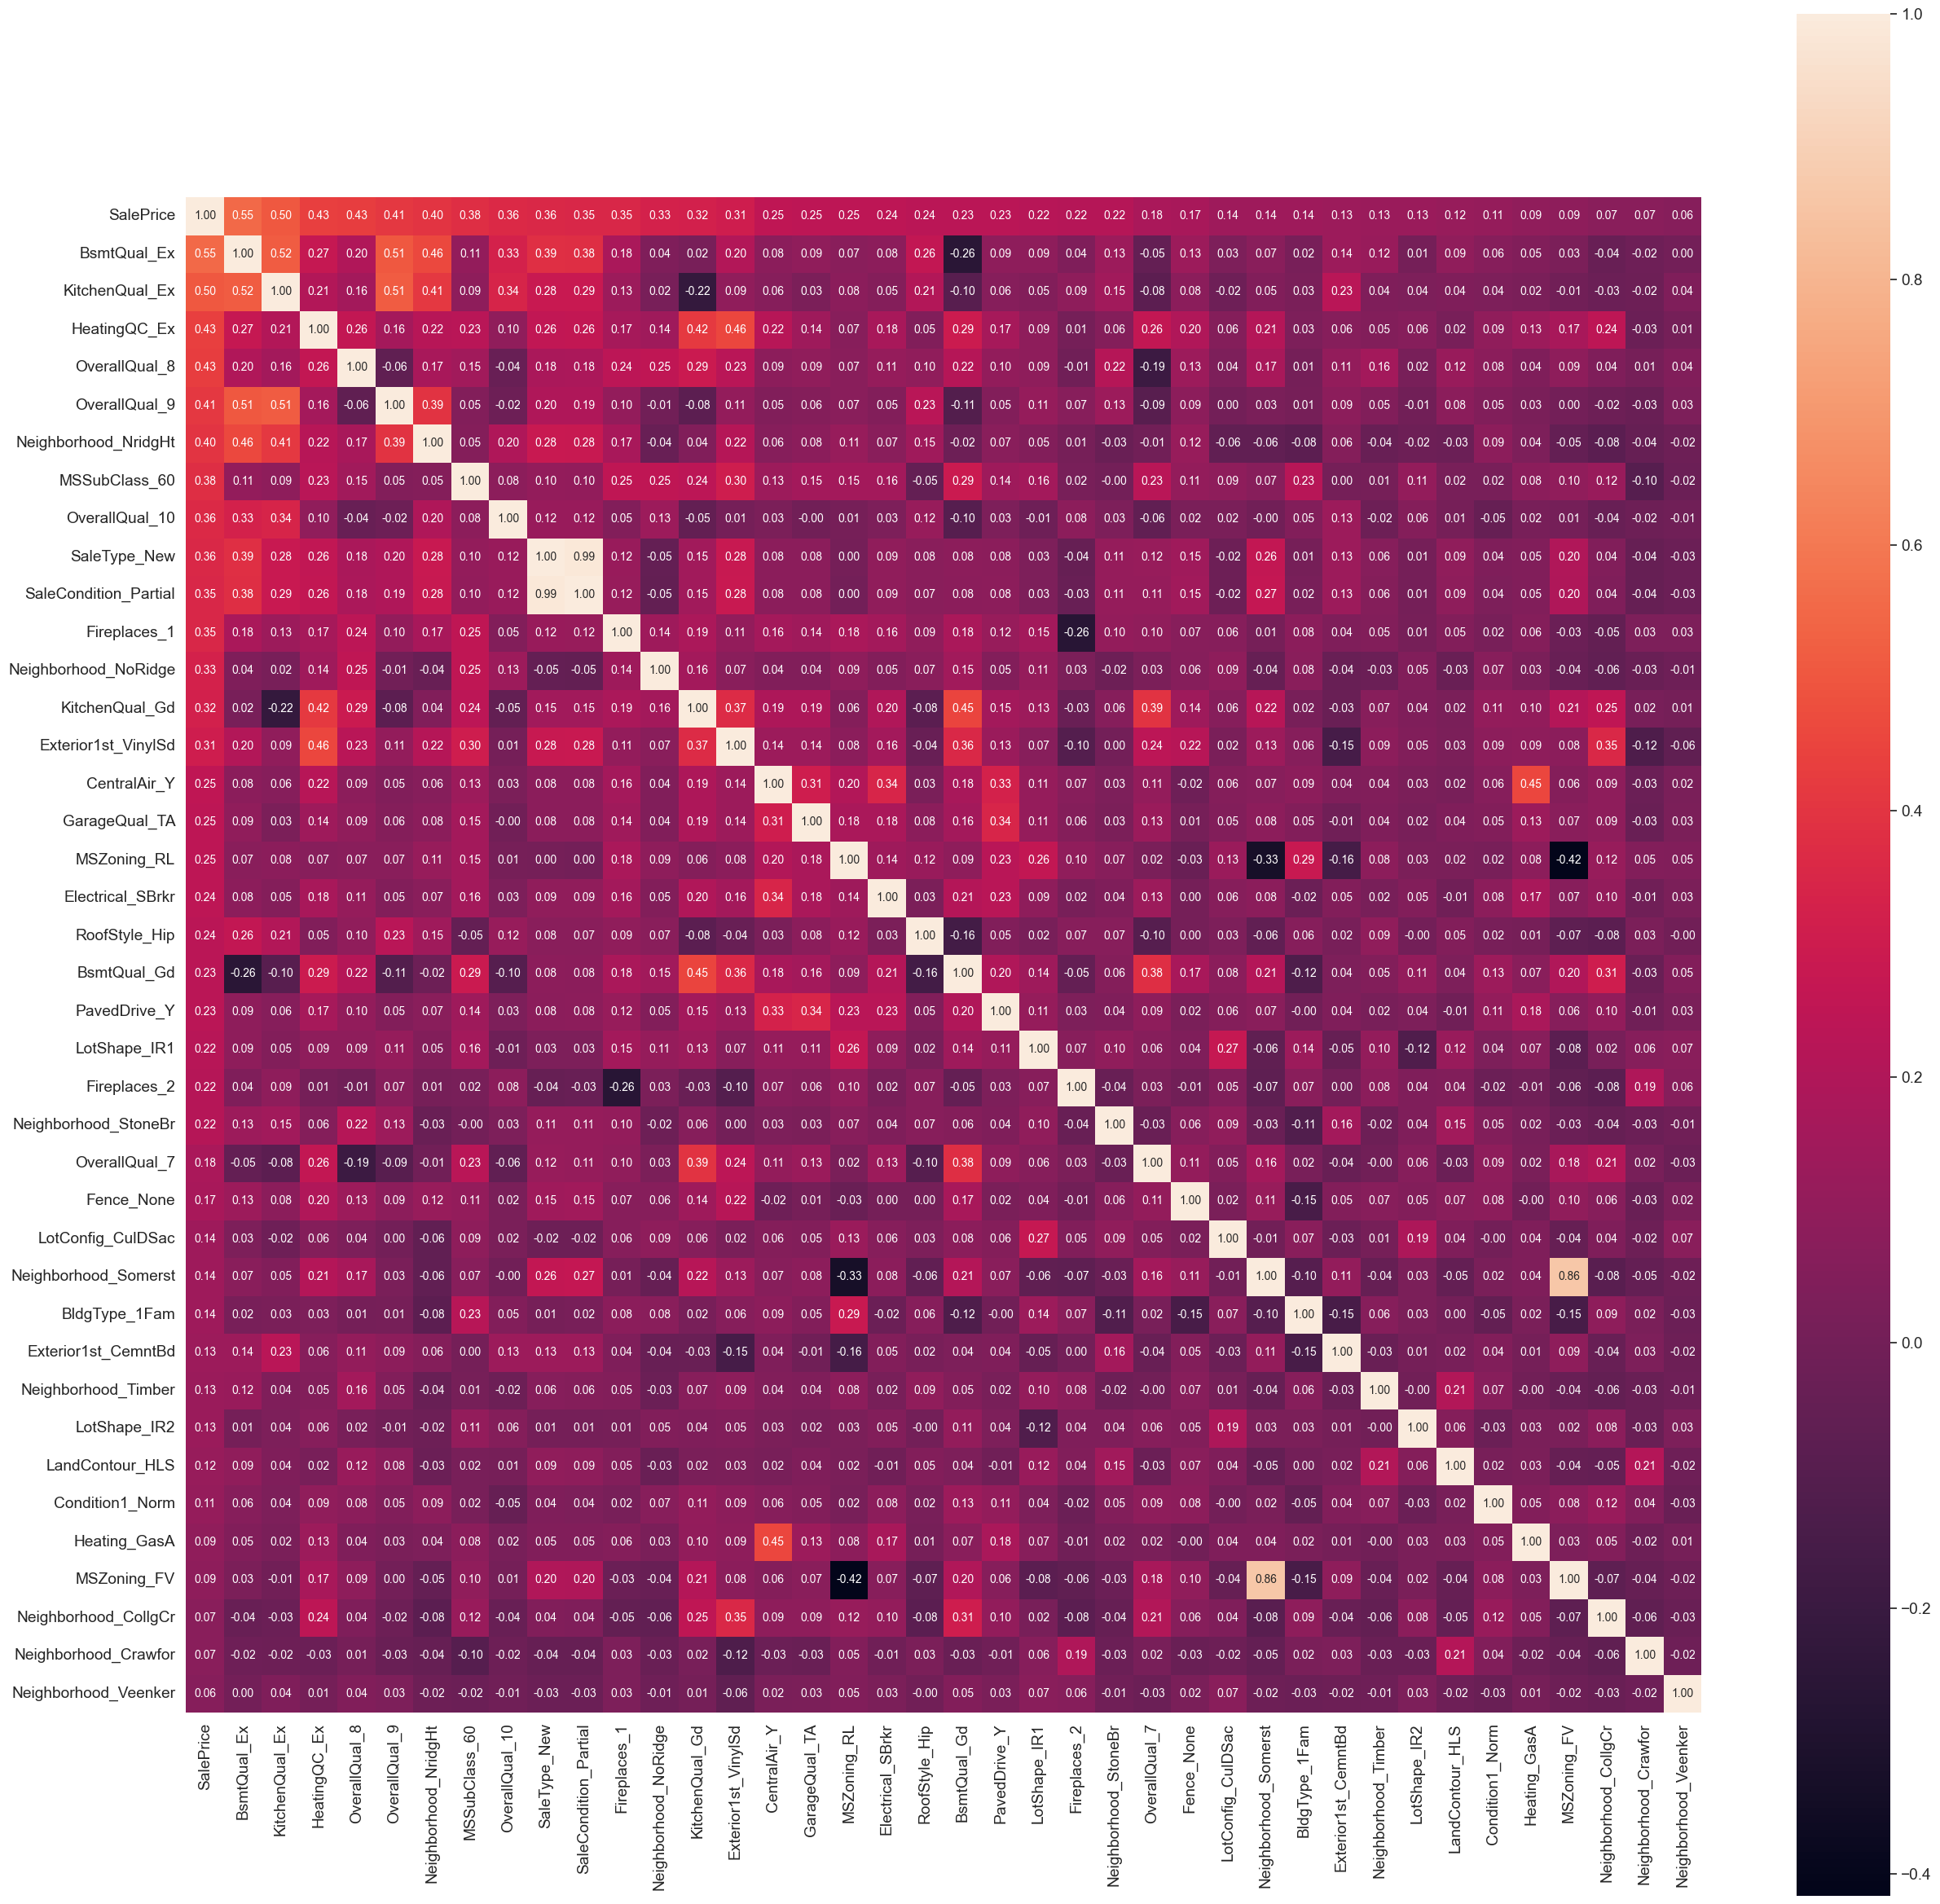

In [25]:
transformed_data = pd.concat([X_transformed, y], axis=1)
numerical_cols = numerical_cols[:-1]
transformed_data_categorical = transformed_data.drop(numerical_cols, axis=1)

#saleprice correlation matrix - categorical
corrmat_categorical = transformed_data_categorical.corr()
corrmat_categorical = corrmat_categorical[corrmat_categorical.columns.sort_values()].sort_index()

plt.figure(figsize=(30, 30))
k = 40 #number of variables for heatmap
cols = corrmat_categorical.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(transformed_data_categorical[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [26]:
len(X.columns)

50

## Enhancing Even More

### 1. Creating New Features

In [27]:
# Average price per square feet + Estimated price

X['average_price_per_sqft'] = y / X['GrLivArea']

average_price_per_sqft = X['average_price_per_sqft'].mean()

X['estimated_price'] = X['GrLivArea'] * average_price_per_sqft

test_data['estimated_price'] = test_data['GrLivArea'] * average_price_per_sqft

X = X.drop(['average_price_per_sqft'], axis=1)

In [28]:
# BsmtFinSF

X['BsmtFinSF'] = X['TotalBsmtSF'] - X['BsmtUnfSF']

test_data['BsmtFinSF'] = test_data['TotalBsmtSF'] - test_data['BsmtUnfSF']

In [29]:
categorical_cols = [col for col in X.columns if X[col].dtype not in ['int64', 'float64']]
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
numerical_cols = [col for col in numerical_cols if col not in suspected_categorical]
categorical_cols.extend(suspected_categorical)

for col in not_important_categorical_cols:
    if col in categorical_cols:
        categorical_cols.remove(col)

#### Rechecking the model

In [30]:
# Preprocessing for numerical data
numerical_transformer_2 = SimpleImputer(strategy='median')

# Preprocessing of categorical data
one_hot_2 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

categorical_transformer_2 = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', one_hot_2)
])

# Full column transformer
preprocessor_2 = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer_2, numerical_cols),
        ('categorical', categorical_transformer_2, categorical_cols)
    ]
)

# Define a Random Forest model
rf_model_2 = RandomForestRegressor(random_state=32, n_estimators=100, n_jobs=-1)

# Full data pipeline
rf_pipeline_2 = Pipeline(steps=[
    ('preprocessor', preprocessor_2),
    ('model', rf_model_2)
])

In [31]:
rf_pipeline_2.fit(X, y)

# Access model from pipeline
model_2 = rf_pipeline_2.named_steps['model']

# Access preprocessor from pipeline
preprocessor_2 = rf_pipeline_2.named_steps['preprocessor']

# Extract transformed categorical columns from preprocessor
categorical_cols_transformed = preprocessor_2.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(categorical_cols)

# Combine transformed categorical columns and numerical columns
new_cols = list(numerical_cols) + list(categorical_cols_transformed)

# Extract transformed data from preprocessor
X_transformed_data = preprocessor_2.transform(X)

# Reconstitute DataFrame after preprocessing
X_transformed = pd.DataFrame(X_transformed_data, columns=new_cols)

# Cross-Validation
cv_scores = cross_val_score(model, X_transformed, y, cv=5)
print(f"Cross-validation scores: {cv_scores}, scores average: {cv_scores.mean(), 'std: ', cv_scores.std()}\n\n")

cv_scores_nmse = cross_val_score(model_2, X_transformed, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {cv_scores_nmse}, scores average: {cv_scores_nmse.mean(), 'std: ', cv_scores_nmse.std()}")

Cross-validation scores: [0.85612565 0.82620436 0.86385973 0.88450498 0.80757681], scores average: (0.8476543069686742, 'std: ', 0.02741772378018644)


Cross-validation scores: [-8.07579050e+08 -1.11780445e+09 -1.02220381e+09 -5.30519709e+08
 -1.29649256e+09], scores average: (-954919915.2325716, 'std: ', 264406969.9877383)


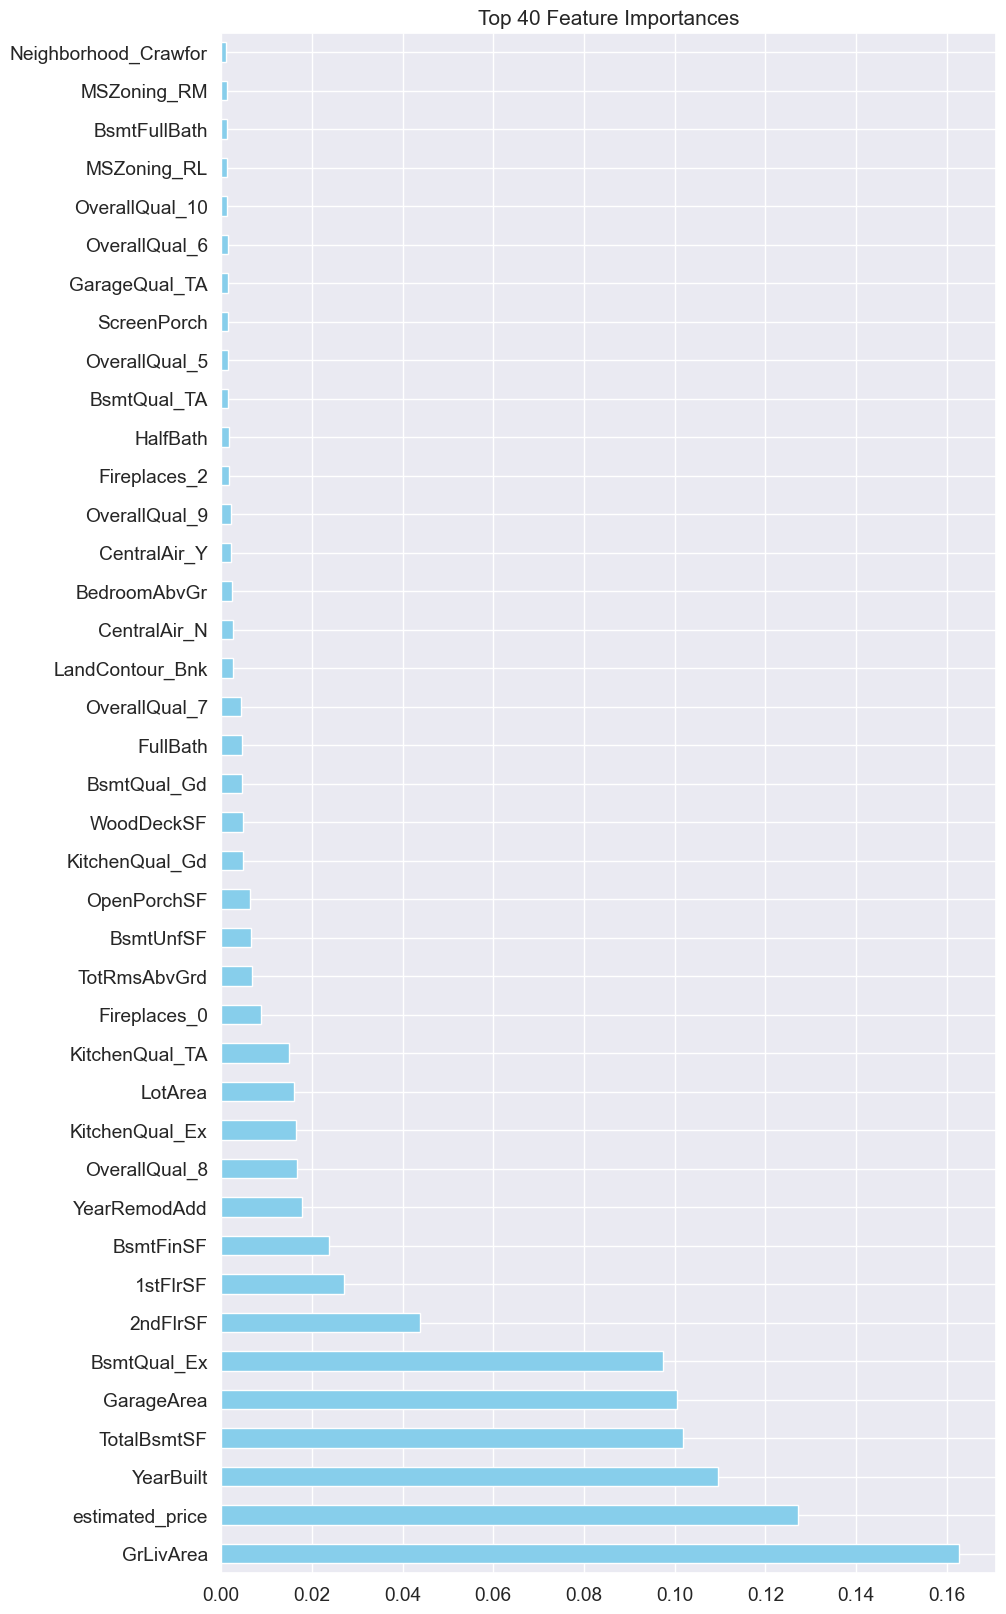

In [32]:
plot_top_n_importance(DataFrame=X_transformed, model=model_2, top_n=40)

In [33]:
data_transf = pd.concat([X_transformed, y], axis=1)
data_transf.columns

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       ...
       'MoSold_9', 'MoSold_10', 'MoSold_11', 'MoSold_12', 'YrSold_2006',
       'YrSold_2007', 'YrSold_2008', 'YrSold_2009', 'YrSold_2010',
       'SalePrice'],
      dtype='object', length=218)

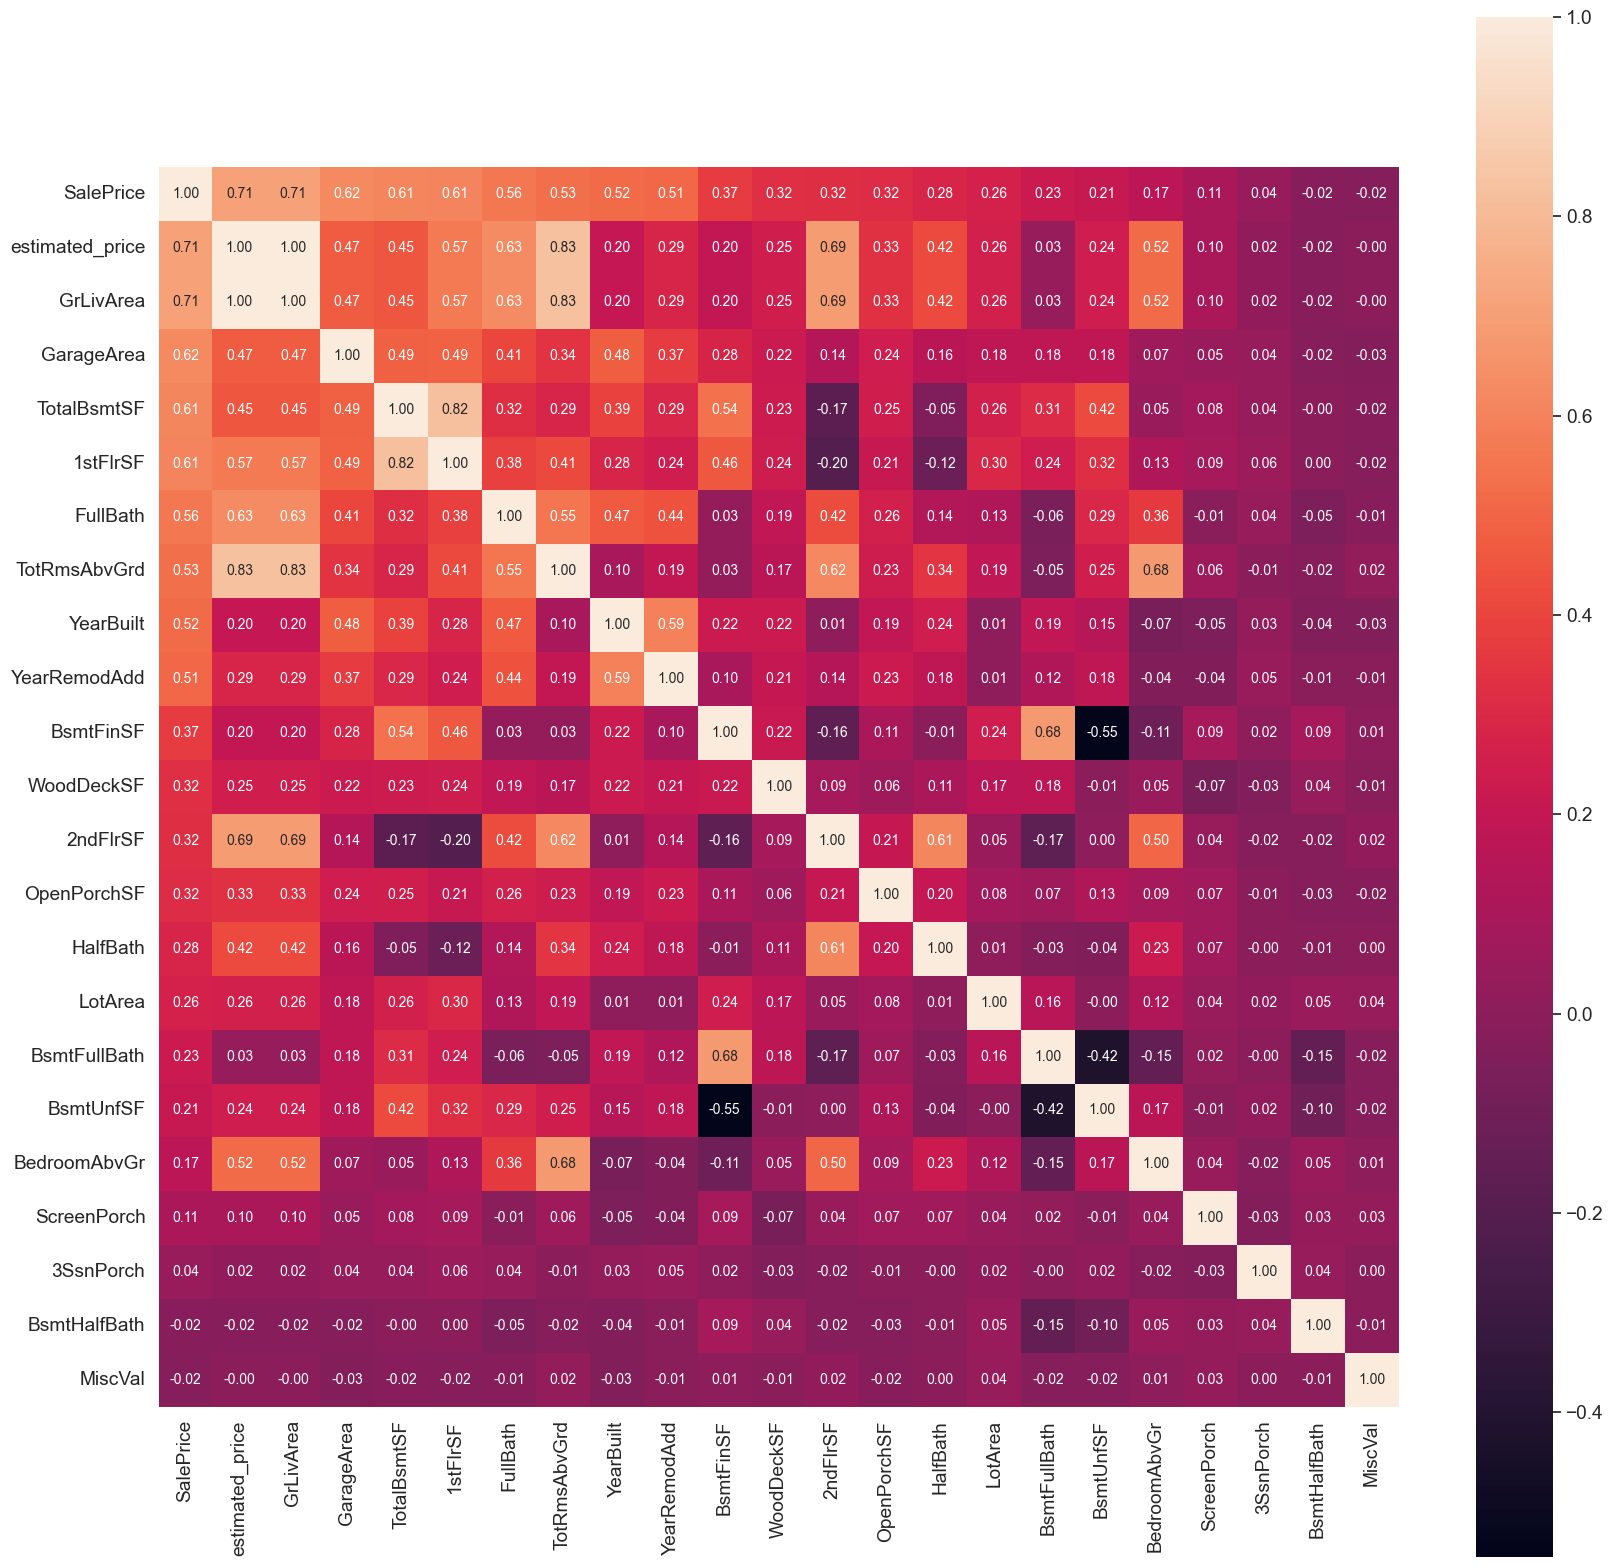

In [34]:
#saleprice correlation matrix
numerical_cols.extend(['SalePrice'])
corrmat = data_transf[numerical_cols].corr()

plt.figure(figsize=(20, 20))
k = 23 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_transf[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- 'TotRmsAbvGrd', 'BsmtUnfSF'

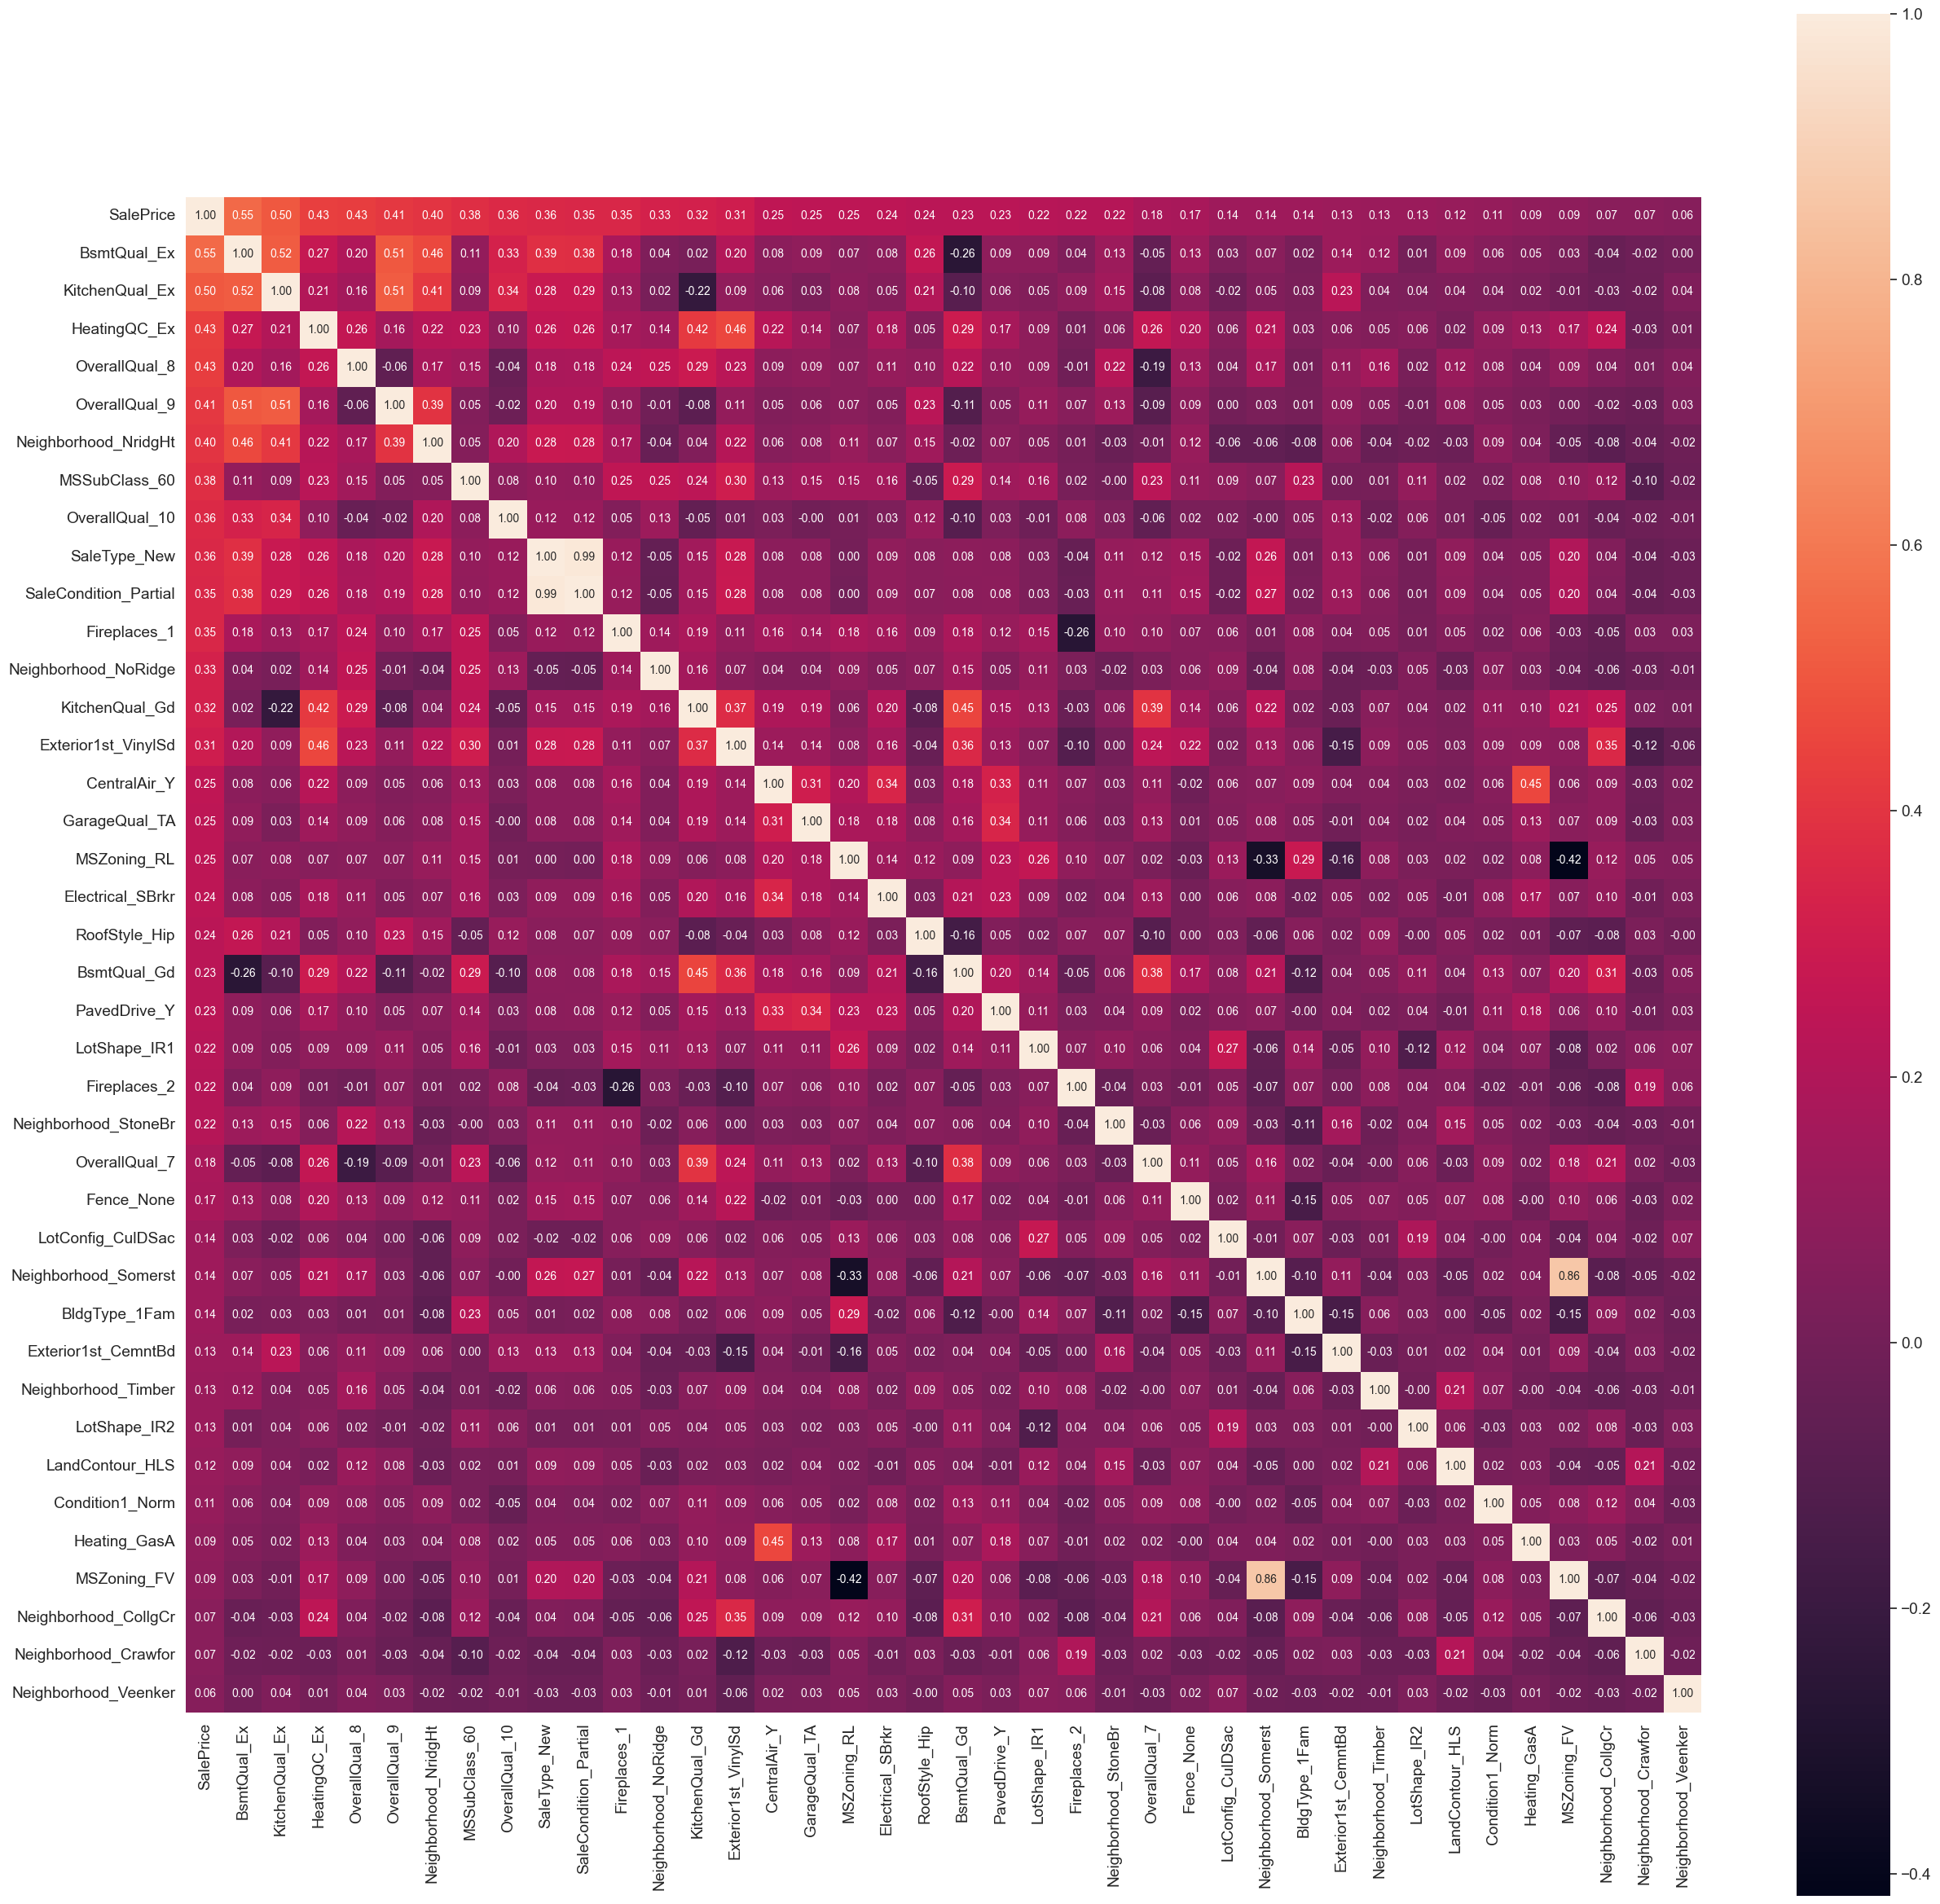

In [35]:
#saleprice correlation matrix - categorical
numerical_cols = numerical_cols[:-1]
data_transf_cat = data_transf.drop(numerical_cols, axis=1)
corrmat_categorical = data_transf_cat.corr()
corrmat_categorical = corrmat_categorical[corrmat_categorical.columns.sort_values()].sort_index()

plt.figure(figsize=(30, 30))
k = 40 #number of variables for heatmap
cols = corrmat_categorical.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_transf_cat[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

- 'SaleType', ''SaleCondition'

In [36]:
X = X.drop(['TotRmsAbvGrd', 'BsmtUnfSF', 'SaleType', 'SaleCondition'], axis=1)

categorical_cols = [col for col in X.columns if X[col].dtype not in ['int64', 'float64']]
numerical_cols = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
numerical_cols = [col for col in numerical_cols if col not in suspected_categorical]
categorical_cols.extend(suspected_categorical)

for col in not_important_categorical_cols:
    if col in categorical_cols:
        categorical_cols.remove(col)

In [37]:
# Preprocessing for numerical data
numerical_transformer_3 = SimpleImputer(strategy='median')

# Preprocessing of categorical data
one_hot_3 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

categorical_transformer_3 = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', one_hot_3)
])

# Full column transformer
preprocessor_3 = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer_3, numerical_cols),
        ('categorical', categorical_transformer_3, categorical_cols)
    ]
)

# Define a Random Forest model
rf_model_3 = RandomForestRegressor(random_state=32, n_estimators=100, n_jobs=-1)

# Full data pipeline
rf_pipeline_3 = Pipeline(steps=[
    ('preprocessor', preprocessor_3),
    ('model', rf_model_3)
])

In [38]:
rf_pipeline_3.fit(X, y)

# Access model from pipeline
model_3 = rf_pipeline_3.named_steps['model']

# Access preprocessor from pipeline
preprocessor_3 = rf_pipeline_3.named_steps['preprocessor']

# Extract transformed categorical columns from preprocessor
categorical_cols_transformed = preprocessor_3.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(categorical_cols)

# Combine transformed categorical columns and numerical columns
new_cols = list(numerical_cols) + list(categorical_cols_transformed)

# Extract transformed data from preprocessor
X_transformed_data = preprocessor_3.transform(X)

# Reconstitute DataFrame after preprocessing
X_transformed = pd.DataFrame(X_transformed_data, columns=new_cols)

# Cross-Validation
cv_scores = cross_val_score(model, X_transformed, y, cv=5)
print(f"Cross-validation scores: {cv_scores}, scores average: {cv_scores.mean(), 'std: ', cv_scores.std()}\n\n")

cv_scores_nmse = cross_val_score(model_3, X_transformed, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {cv_scores_nmse}, scores average: {cv_scores_nmse.mean(), 'std: ', cv_scores_nmse.std()}")

Cross-validation scores: [0.86241237 0.83293502 0.86664201 0.88622878 0.81251716], scores average: (0.8521470684315343, 'std: ', 0.026140676901467277)


Cross-validation scores: [-7.73845324e+08 -1.06116796e+09 -9.76213263e+08 -5.48066803e+08
 -1.30441270e+09], scores average: (-932741209.116658, 'std: ', 256805469.10384113)


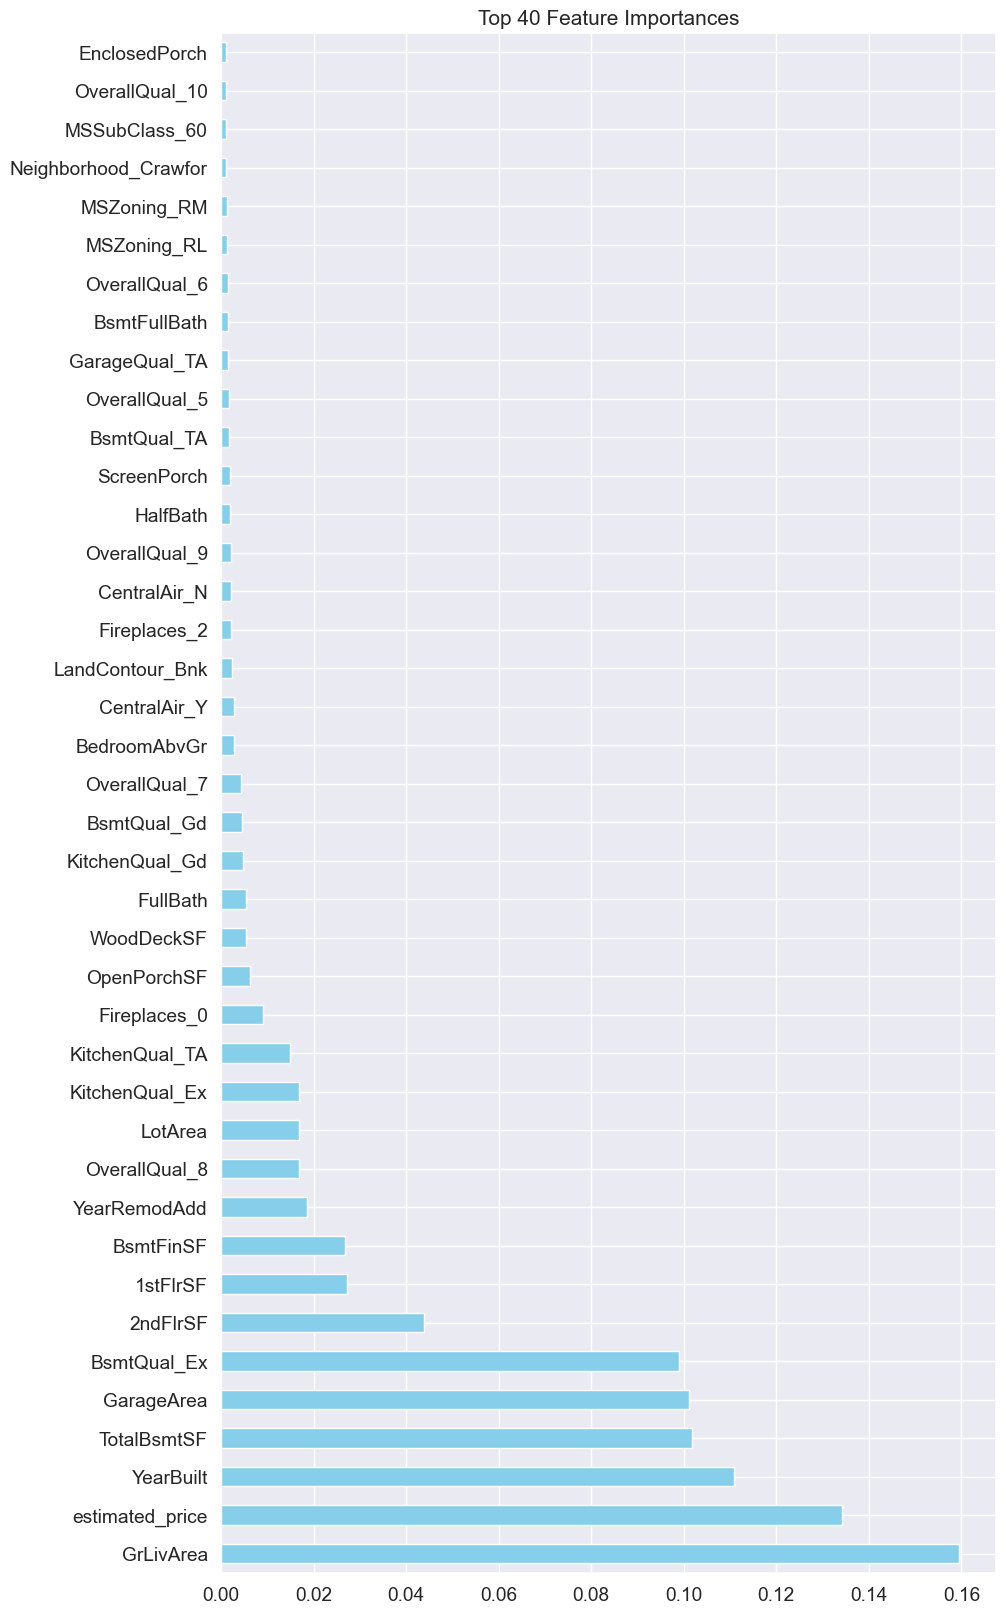

In [39]:
plot_top_n_importance(DataFrame=X_transformed, model=model_3, top_n=40)

### 2. Normalization

#### Train  Data:

In [40]:
# # Check the skew of all numerical features
# skewed_feats = X[numerical_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skewness = pd.DataFrame({'Skew' :skewed_feats})
# skewness.sort_values(by='Skew', ascending=False)

In [41]:
# skewness = skewness[abs(skewness) > 0.75]
# print(f"There are {skewness.shape[0]} skewed numerical features to Box Cox transform")

# from scipy.special import boxcox1p
# skewed_features = skewness.index
# lam = 0.15
# for feat in skewed_features:
#     #all_data[feat] += 1
#     X[feat] = boxcox1p(X[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

#### Target  Data:

In [42]:
# y = boxcox1p(y, lam)

#### Test  Data:

In [43]:
# # Check the skew of all numerical features
# skewed_feats_test = test_data[numerical_cols].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
# print("\nSkew in numerical features: \n")
# skewness_test = pd.DataFrame({'Skew' :skewed_feats})
# skewness_test.sort_values(by='Skew', ascending=False)

In [44]:
# skewness_test = skewness_test[abs(skewness_test) > 0.75]
# print(f"There are {skewness_test.shape[0]} skewed numerical features to Box Cox transform")

# from scipy.special import boxcox1p
# skewed_features_test = skewness_test.index
# lam = 0.15
# for feat in skewed_features_test:
#     #all_data[feat] += 1
#     test_data[feat] = boxcox1p(X[feat], lam)
    
# #all_data[skewed_features] = np.log1p(all_data[skewed_features])

In [45]:
# Preprocessing for numerical data
numerical_transformer_4 = SimpleImputer(strategy='median')

# Preprocessing of categorical data
one_hot_4 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

categorical_transformer_4 = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', one_hot_4)
])

# Full column transformer
preprocessor_4 = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer_4, numerical_cols),
        ('categorical', categorical_transformer_4, categorical_cols)
    ]
)

# Define a Random Forest model
rf_model_4 = RandomForestRegressor(random_state=32, n_estimators=100, n_jobs=-1)

# Full data pipeline
rf_pipeline_4 = Pipeline(steps=[
    ('preprocessor', preprocessor_4),
    ('model', rf_model_4)
])

In [46]:
rf_pipeline_4.fit(X, y)

# Access model from pipeline
model_4 = rf_pipeline_4.named_steps['model']

# Access preprocessor from pipeline
preprocessor_4 = rf_pipeline_4.named_steps['preprocessor']

# Extract transformed categorical columns from preprocessor
categorical_cols_transformed = preprocessor_4.named_transformers_['categorical'].named_steps['onehot'].get_feature_names_out(categorical_cols)

# Combine transformed categorical columns and numerical columns
new_cols = list(numerical_cols) + list(categorical_cols_transformed)

# Extract transformed data from preprocessor
X_transformed_data = preprocessor_4.transform(X)

# Reconstitute DataFrame after preprocessing
X_transformed = pd.DataFrame(X_transformed_data, columns=new_cols)

# Cross-Validation
cv_scores = cross_val_score(model, X_transformed, y, cv=5)
print(f"Cross-validation scores: {cv_scores}, scores average: {cv_scores.mean(), 'std: ', cv_scores.std()}\n\n")

cv_scores_nmse = cross_val_score(model_4, X_transformed, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {cv_scores_nmse}, scores average: {cv_scores_nmse.mean(), 'std: ', cv_scores_nmse.std()}")

Cross-validation scores: [0.86241237 0.83293502 0.86664201 0.88622878 0.81251716], scores average: (0.8521470684315343, 'std: ', 0.026140676901467277)


Cross-validation scores: [-7.73845324e+08 -1.06116796e+09 -9.76213263e+08 -5.48066803e+08
 -1.30441270e+09], scores average: (-932741209.116658, 'std: ', 256805469.10384113)


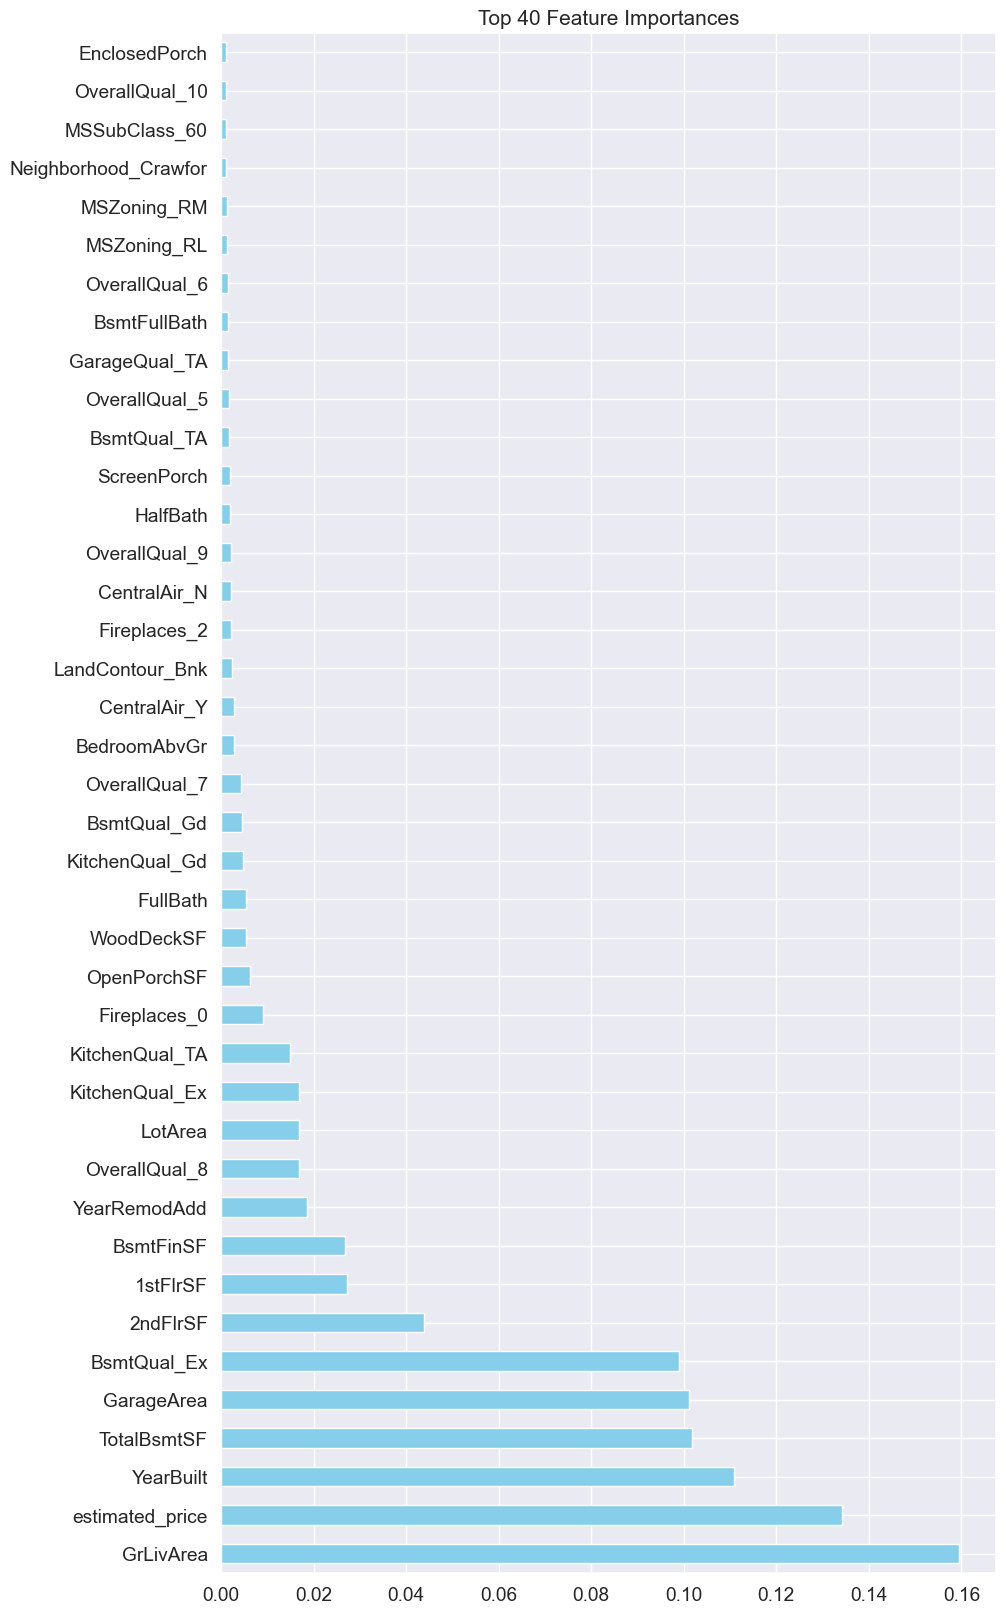

In [47]:
plot_top_n_importance(DataFrame=X_transformed, model=model_4, top_n=40)

In [48]:
len(X_transformed.columns)

200

In [49]:
transformed_test_data = preprocessor_4.transform(test_data)
test_transformed = pd.DataFrame(transformed_test_data, columns=new_cols)

In [50]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

XG_model = xgb.XGBRegressor(random_state=0)

XG_model.fit(X_transformed, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=0, ...)

In [51]:
cv_scores = cross_val_score(XG_model, X_transformed, y, cv=5)
print(f"Cross-validation scores: {cv_scores}, scores average: {cv_scores.mean(), 'std: ', cv_scores.std()}\n\n")

cv_scores_nmse = cross_val_score(XG_model, X_transformed, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {cv_scores_nmse}, scores average: {cv_scores_nmse.mean(), 'std: ', cv_scores_nmse.std()}")

Cross-validation scores: [0.83571245 0.773153   0.86715302 0.89877909 0.83137069], scores average: (0.8412336513558445, 'std: ', 0.041823504774920896)


Cross-validation scores: [-9.08942183e+08 -1.49053672e+09 -1.00668755e+09 -5.12770451e+08
 -1.13072183e+09], scores average: (-1009931747.3562324, 'std: ', 317159315.3183525)


In [52]:
predictions_1 = XG_model.predict(test_transformed)

In [53]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [300, 500, 1000],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

# Initialize the XGBoost Regressor
xgb_reg = xgb.XGBRegressor(random_state=0, n_jobs=-1)

# Initialize the Grid Search model
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_transformed, y)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1}


In [62]:
X_train, X_valid, y_train, y_valid = train_test_split(X_transformed, y, test_size=0.3, random_state=32)

In [75]:
XG_model = xgb.XGBRegressor(random_state=0, learning_rate=0.1, colsample_bytree=0.8, max_depth=3, subsample=1)

XG_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_valid, y_valid)], verbose=False)

cv_scores = cross_val_score(XG_model, X_transformed, y, cv=5)
print(f"Cross-validation scores: {cv_scores}, scores average: {cv_scores.mean(), 'std: ', cv_scores.std()}\n\n")

cv_scores_nmse = cross_val_score(XG_model, X_transformed, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {cv_scores_nmse}, scores average: {cv_scores_nmse.mean(), 'std: ', cv_scores_nmse.std()}")

Cross-validation scores: [0.85657465 0.85118361 0.88310461 0.90753035 0.88294649], scores average: (0.8762679415052019, 'std: ', 0.020424156754206974)


Cross-validation scores: [-7.93519379e+08 -9.77823378e+08 -8.85809634e+08 -4.68437833e+08
 -7.84887033e+08], scores average: (-782095451.3692806, 'std: ', 171805386.34867156)


In [74]:
# After fitting the model
optimal_n_estimators = XG_model.best_iteration + 1
print("Optimal number of trees (n_estimators):", optimal_n_estimators)

Optimal number of trees (n_estimators): 34


In [78]:
XG_model = xgb.XGBRegressor(
    random_state=0, 
    learning_rate=0.1, 
    colsample_bytree=0.8, 
    max_depth=3, 
    subsample=1, 
    n_estimators=optimal_n_estimators, 
    n_jobs=-1
    )


XG_model.fit(X_train, y_train, early_stopping_rounds=10, eval_set=[(X_valid, y_valid)], verbose=False)

cv_scores = cross_val_score(XG_model, X_transformed, y, cv=5)
print(f"Cross-validation scores: {cv_scores}, scores average: {cv_scores.mean(), 'std: ', cv_scores.std()}\n\n")

cv_scores_nmse = cross_val_score(XG_model, X_transformed, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {cv_scores_nmse}, scores average: {cv_scores_nmse.mean(), 'std: ', cv_scores_nmse.std()}")

Cross-validation scores: [0.83362558 0.8141539  0.83568833 0.86536234 0.82423572], scores average: (0.8346131731469605, 'std: ', 0.01716925066913874)


Cross-validation scores: [-9.20488071e+08 -1.22113333e+09 -1.24512068e+09 -6.82054853e+08
 -1.17856448e+09], scores average: (-1049472280.8570888, 'std: ', 217275445.94087633)


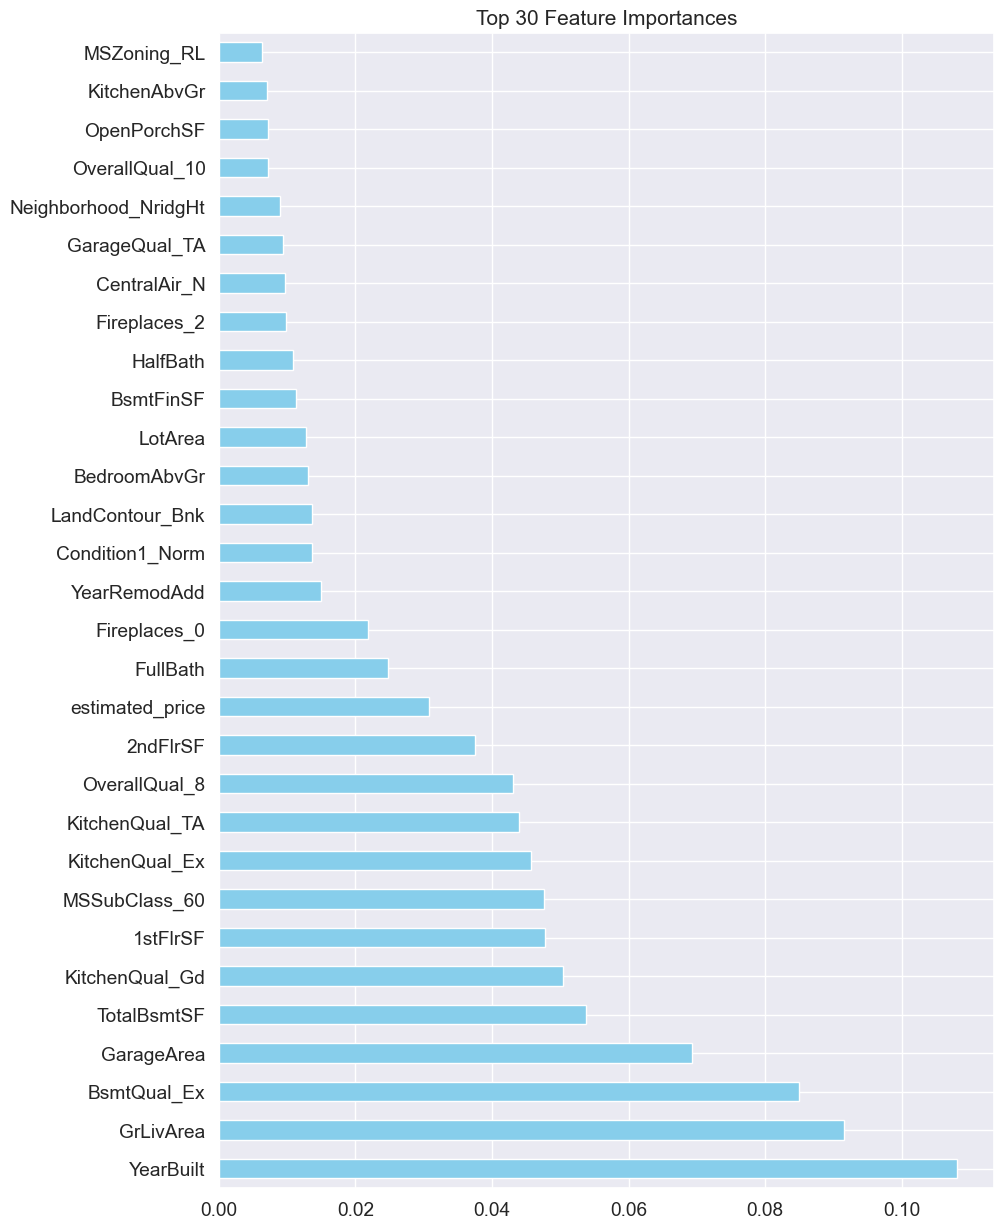

In [79]:
plot_top_n_importance(X_transformed, model=XG_model, top_n=30)

In [80]:
X = X_transformed

In [108]:
from sklearn.feature_selection import RFE

# Initialize XGBoost Regressor
XG_model = xgb.XGBRegressor(
    random_state=0, 
    learning_rate=0.1, 
    colsample_bytree=0.8, 
    max_depth=3, 
    subsample=1, 
    n_estimators=optimal_n_estimators, 
    n_jobs=-1
    )

# Initialize RFE with XGBoost Regressor
rfe = RFE(estimator=XG_model, n_features_to_select=30)

# Fit RFE
rfe.fit(X, y)

# Print selected features
selected_features = np.array(X.columns)[rfe.support_]
print("Selected features:", selected_features)

Selected features: ['LotArea' 'YearBuilt' 'YearRemodAdd' 'TotalBsmtSF' '1stFlrSF' '2ndFlrSF'
 'GrLivArea' 'BsmtFullBath' 'HalfBath' 'KitchenAbvGr' 'GarageArea'
 'WoodDeckSF' 'OpenPorchSF' 'estimated_price' 'BsmtFinSF'
 'MSZoning_C (all)' 'MSZoning_RL' 'LandContour_Bnk' 'BsmtQual_Ex'
 'CentralAir_N' 'KitchenQual_Ex' 'KitchenQual_Gd' 'KitchenQual_TA'
 'GarageQual_TA' 'MSSubClass_60' 'OverallQual_8' 'OverallQual_9'
 'OverallQual_10' 'Fireplaces_0' 'Fireplaces_2']


In [109]:
X_selected = rfe.transform(X)

XG_model.fit(X_selected, y, verbose=False)

cv_scores = cross_val_score(XG_model, X_transformed, y, cv=5)
print(f"Cross-validation scores: {cv_scores}, scores average: {cv_scores.mean(), 'std: ', cv_scores.std()}\n\n")

cv_scores_nmse = cross_val_score(XG_model, X_transformed, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validation scores: {cv_scores_nmse}, scores average: {cv_scores_nmse.mean(), 'std: ', cv_scores_nmse.std()}")

Cross-validation scores: [0.83362558 0.8141539  0.83568833 0.86536234 0.82423572], scores average: (0.8346131731469605, 'std: ', 0.01716925066913874)


Cross-validation scores: [-9.20488071e+08 -1.22113333e+09 -1.24512068e+09 -6.82054853e+08
 -1.17856448e+09], scores average: (-1049472280.8570888, 'std: ', 217275445.94087633)


In [110]:
X_selected = pd.DataFrame(X_selected, columns=rfe.get_feature_names_out())

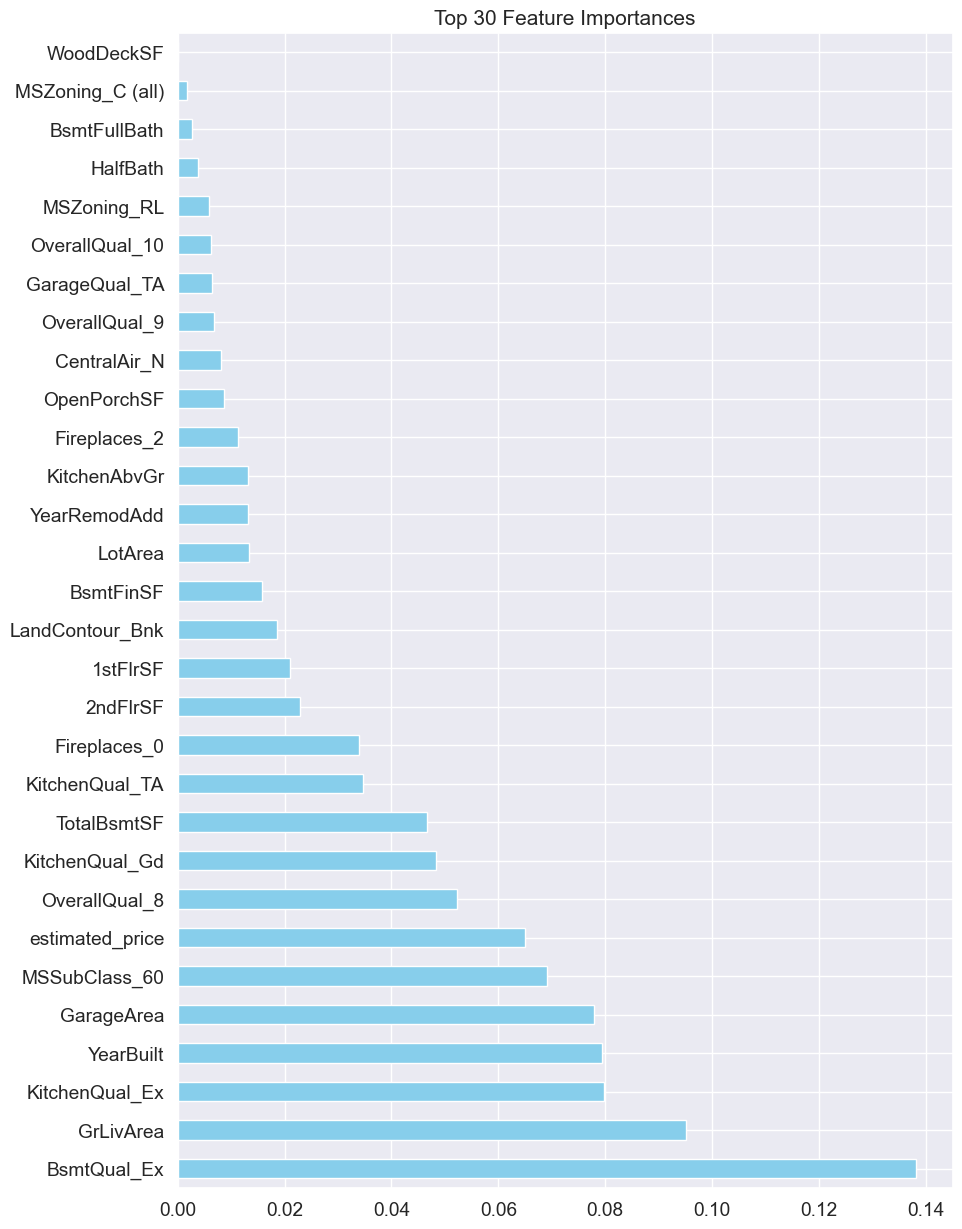

In [111]:
plot_top_n_importance(X_selected, model=XG_model, top_n=30)

In [112]:
# Initialize XGBoost Regressor
XG_model_2 = xgb.XGBRegressor(
    random_state=0, 
    learning_rate=0.1, 
    colsample_bytree=0.8, 
    max_depth=3, 
    subsample=1, 
    n_estimators=optimal_n_estimators, 
    n_jobs=-1
    )

XG_model_2.fit(X, y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=34, n_jobs=-1,
             num_parallel_tree=None, random_state=0, ...)

In [ ]:
import shap

In [54]:
# predictions = rf_pipeline_4.predict(test_data)

# # Prepare submission file
# submission = pd.DataFrame({
#     'Id': test_data_origin['Id'],
#     'SalePrice': predictions
# })

# file_name = input('File Name: ')

# # Save submission file
# submission.to_csv(f'{file_name}.csv', index=False)